<a href="https://colab.research.google.com/github/peiyulin0520/KPMG-virtual-intern-tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1: 
identify data issues in three datasets: 
1. Transactions
2. CustomerDemographic
3. CustomerAddress

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [2]:
# read in excel file
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =1, header = 1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =4, header = 1)

<ipython-input-2-2642beeb97cb>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)


In [3]:
# observe Transactions dataset briefly
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [4]:
# get the overview of the dataset, including data type, the number of NA values, the number of rows etc.
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [6]:
Transactions['transaction_date'].agg(['min', 'max'])

min   2017-01-01
max   2017-12-30
Name: transaction_date, dtype: datetime64[ns]

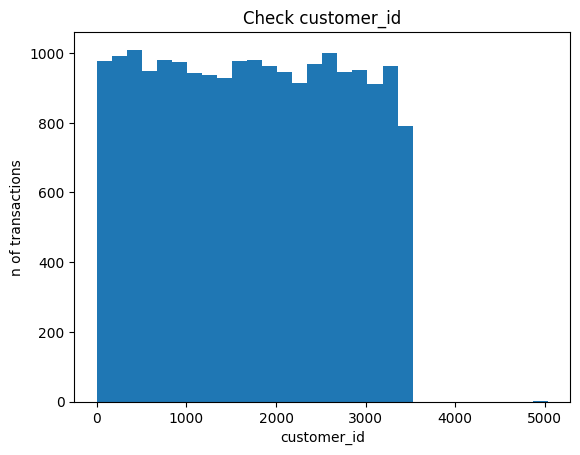

In [21]:
import matplotlib.pyplot as plt
plt.hist(Transactions['customer_id'], bins=30)
plt.title('Check customer_id')
plt.xlabel('customer_id')
plt.ylabel('n of transactions')
plt.show()

there are extreme value in customer_id, and it is unreasonable and must be mistyped.

In [7]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [9]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

[2002.0, 2002.0, 2001.0, 2001.0, 2001.0, 2000.0, 2000.0, 2000.0, 1999.0, 1999.0, 1998.0, 1997.0, 1997.0, 1997.0, 1997.0, 1996.0, 1995.0, 1995.0, 1995.0, 1994.0, 1994.0, 1993.0, 1992.0, 1989.0, 1989.0, 1988.0, 1988.0, 1988.0, 1986.0, 1985.0, 1985.0, 1985.0, 1984.0, 1983.0, 1983.0, 1981.0, 1981.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1979.0, 1979.0, 1978.0, 1978.0, 1978.0, 1978.0, 1978.0, 1978.0, 1977.0, 1977.0, 1977.0, 1977.0, 1977.0, 1976.0, 1976.0, 1976.0, 1976.0, 1976.0, 1975.0, 1975.0, 1974.0, 1974.0, 1974.0, 1973.0, 1973.0, 1972.0, 1972.0, 1970.0, 1969.0, 1969.0, 1968.0, 1968.0, 1967.0, 1967.0, 1967.0, 1967.0, 1966.0, 1966.0, 1966.0, 1965.0, 1965.0, 1963.0, 1962.0, 1962.0, 1962.0, 1962.0, 1961.0, 1961.0, 1960.0, 1960.0, 1959.0, 1959.0, 1958.0, 1958.0, 1957.0, 1956.0, 1955.0, 1955.0, 1955.0, 1954.0, 1954.0, 1954.0, 1953.0, 1843.0, nan, nan, 2001.0, 1997.0, 1997.0, 1997.0, 1996.0, 1995.0, 1995.0, 1995.0, 1994.0, 1994.0, 1994.0, 1994.0, 1993.0, 1993.0, 1992.0, 1992.0, 1992.0, 1990.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,   0.,
          0.,  80., 192., 207., 195., 292., 204., 264., 418., 539., 243.,
        288., 218., 175., 229., 221., 142.]),
 array([1843.  , 1846.18, 1849.36, 1852.54, 1855.72, 1858.9 , 1862.08,
        1865.26, 1868.44, 1871.62, 1874.8 , 1877.98, 1881.16, 1884.34,
        1887.52, 1890.7 , 1893.88, 1897.06, 1900.24, 1903.42, 1906.6 ,
        1909.78, 1912.96, 1916.14, 1919.32, 1922.5 , 1925.68, 1928.86,
        1932.04, 1935.22, 1938.4 , 1941.58, 1944.76, 1947.94, 1951.12,
        1954.3 , 1957.48, 1960.66, 1963.84, 1967.02, 1970.2 , 1973.38,
        1976.56, 1979.74, 1982.92, 1986.1 , 1989.28, 1992.46, 1995.64,
        1998.82, 2002.  ]),
 <BarContainer object of 50 artists>)

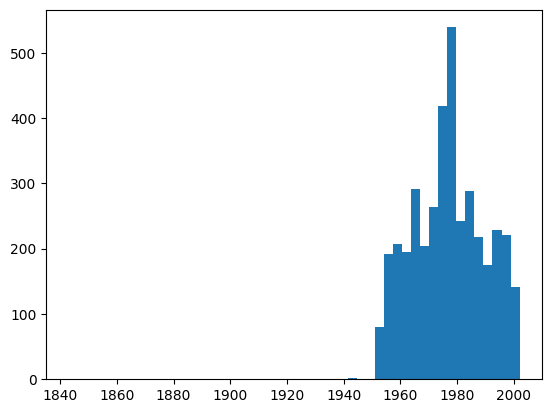

In [37]:
import datetime
year = CustomerDemographic['DOB'].dt.year
print(sorted(year, reverse=True))
plt.hist(year, bins=50)

DOB data column years before 1923, which means some of the customers are over 100 years old. It is not reasonable when the lifespan is 100.

In [10]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [12]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [22]:
# check the category in state
CustomerAddress['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

1. New South Wales should be NSW.
2. Victoria should be VIC.

In [25]:
demographoic_id = set(CustomerDemographic['customer_id'])
address_id = set(CustomerAddress['customer_id'])
missing_id_in_demo = address_id - demographoic_id 
print(sorted(missing_id_in_demo))
missing_id_in_address = demographoic_id - address_id
print(sorted(missing_id_in_address))

[4001, 4002, 4003]
[3, 10, 22, 23]


1. The customer_id 4001, 4002, and 4003 only appear in CustomerAddress not in CustomerDemographic.
2. The customer_id 3, 10, 22, and 23 only appear in CustomerDemographic not in CustomerAddress